<a href="https://colab.research.google.com/github/twinkle844/NNDL-lab_2022/blob/main/CNN1_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Small Image Classification Using Convolutional Neural Network (CNN)

IMPLEMENTATION OF CNN FOR IMAGE CLASSIFICATION

AIM: TO implement CNN for image classification using CIFAR-10 Dataset

THEORY:

The CIFAR-10 small photo classification problem is a standard dataset used in computer vision and deep learning.

Although the dataset is effectively solved, it can be used as the basis for learning and practicing how to develop, evaluate, and use convolutional deep learning neural networks for image classification from scratch.

This includes how to develop a robust test harness for estimating the performance of the model, how to explore improvements to the model, and how to save the model and later load it to make predictions on new data.

IMPLEMENTATION:

We will be implementing a CNN Model using CIFAR-10 dataset.

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

LOADING THE DATASET


In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

Plotting Images

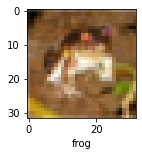

In [ ]:
plot_sample(X_train, y_train, 0)

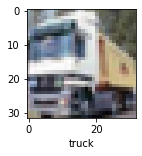

In [ ]:
plot_sample(X_train, y_train, 1)

Normalizing the training data 
Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255



In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.8111 - accuracy: 0.3581
Epoch 2/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.6248 - accuracy: 0.4281
Epoch 3/5
1563/1563 [==============================] - 110s 70ms/step - loss: 1.5428 - accuracy: 0.4569
Epoch 4/5
1563/1563 [==============================] - 111s 71ms/step - loss: 1.4828 - accuracy: 0.4763
Epoch 5/5
1563/1563 [==============================] - 109s 70ms/step - loss: 1.4315 - accuracy: 0.4972


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.49      0.62      0.55      1000
           1       0.53      0.70      0.61      1000
           2       0.42      0.27      0.33      1000
           3       0.42      0.11      0.18      1000
           4       0.45      0.36      0.40      1000
           5       0.38      0.42      0.40      1000
           6       0.38      0.77      0.51      1000
           7       0.68      0.40      0.50      1000
           8       0.60      0.66      0.62      1000
           9       0.57      0.48      0.52      1000

    accuracy                           0.48     10000
   macro avg       0.49      0.48      0.46     10000
weighted avg       0.49      0.48      0.46     10000



convolutional neural network to train our images

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.4659 - accuracy: 0.4725
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1054 - accuracy: 0.6127
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9761 - accuracy: 0.6604
Epoch 4/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.8939 - accuracy: 0.6884
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8345 - accuracy: 0.7114
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7839 - accuracy: 0.7295
Epoch 7/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7400 - accuracy: 0.7416
Epoch 8/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.7031 - accuracy: 0.7586
Epoch 9/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.6675 - accuracy: 0.7676
Epoch 10/10
1563/1563 [==============================] - 63s 40m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 0.9094 - accuracy: 0.7024


[0.909384548664093, 0.7024000287055969]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.33578808e-03, 1.75502573e-04, 5.44961216e-03, 9.24816906e-01,
        4.44895733e-04, 4.20797467e-02, 1.44272409e-02, 2.60871369e-04,
        7.91293569e-03, 9.65423023e-05],
       [1.74161524e-03, 2.20176764e-02, 2.51772099e-06, 7.57067937e-07,
        1.37007037e-08, 3.06903436e-09, 6.98422440e-08, 9.53422896e-10,
        9.76130188e-01, 1.07118205e-04],
       [5.21145668e-03, 1.21257886e-01, 1.12539768e-04, 3.25351546e-04,
        2.08789024e-05, 5.56663472e-05, 3.56002383e-05, 6.39008940e-05,
        8.59659195e-01, 1.32574793e-02],
       [9.90089536e-01, 2.55996734e-03, 1.94332839e-04, 1.64118446e-05,
        2.48104207e-05, 4.88818557e-07, 2.73400985e-07, 3.77585457e-06,
        7.10450625e-03, 5.89899082e-06],
       [1.26008831e-06, 2.40824738e-06, 2.71677021e-02, 3.61624570e-03,
        2.48999763e-02, 1.22745434e-04, 9.44183946e-01, 5.75423833e-08,
        5.61684737e-06, 2.17355662e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [ ]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

TypeError: ignored

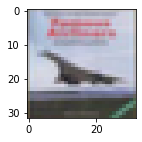

In [ ]:
plot_sample(X_test, y_test,3

In [ ]:
classes[y_classes[3]]

In [ ]:
classes[y_classes[3]]

CONCLUSION:

Here we learnt to:

How to develop a test harness to develop a robust evaluation of a model and establish a baseline of performance for a classification task.
How to explore extensions to a baseline model to improve learning and model capacity.
How to develop a finalized model, evaluate the performance of the final model, and use it to make predictions on new images.